# **Data Scientist Associate Case Study**

**Company Background**

GoalZone is a fitness club chain in Canada. GoalZone offers a range of fitness classes in two capacities - 25 and 15. Some classes are always fully booked. Fully booked classes often have a low attendance rate. GoalZone wants to increase the number of spaces available for classes. They want to do this by predicting whether the member will attend the class or not. If they can predict a member will not attend the class, they can make another space available.

In [1]:
# import libraries for exploring the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/fitness_class_2212.csv")

# view first 5 rows of the data
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [2]:
print("Shape of data: ", df.shape)
print("Information of data: ", df.info())

Shape of data:  (1500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
Information of data:  None


In [3]:
def exp_func(df, col):
    print(f'First five and last five values of {col} variable:')
    print(df[col])
    print('-' * 30)
    print()
    miss_val(df[col])
    print()
    if (df[col].dtype == 'object'):
        unique_val(df[col])
        print()
    if (df[col].dtype == 'int64') | (df[col].dtype == 'float64'):
        val_statistic(df[col])

def miss_val(v):
    print(f'{v.isna().sum()} missing values')

def unique_val(v):
    print(f'{v.nunique()} unique values')
    print('-' * 30)
    print()
    print(v.unique())
    print('-' * 30)
    print()
    print(round(v.value_counts()))
    print('-' * 30)
    print()

def val_statistic(v):
    print(f'Description of {v.name} variable:')
    print(v.describe())

In [4]:
exp_func(df, 'booking_id')

First five and last five values of booking_id variable:
0          1
1          2
2          3
3          4
4          5
        ... 
1495    1496
1496    1497
1497    1498
1498    1499
1499    1500
Name: booking_id, Length: 1500, dtype: int64
------------------------------

0 missing values

Description of booking_id variable:
count    1500.000000
mean      750.500000
std       433.157015
min         1.000000
25%       375.750000
50%       750.500000
75%      1125.250000
max      1500.000000
Name: booking_id, dtype: float64


In [5]:
exp_func(df, 'months_as_member')

First five and last five values of months_as_member variable:
0       17
1       10
2       16
3        5
4       15
        ..
1495    21
1496    29
1497     9
1498    34
1499    20
Name: months_as_member, Length: 1500, dtype: int64
------------------------------

0 missing values

Description of months_as_member variable:
count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64


In [6]:
exp_func(df, 'weight')

First five and last five values of weight variable:
0       79.56
1       79.01
2       74.53
3       86.12
4       69.29
        ...  
1495    79.51
1496    89.55
1497    87.38
1498    68.64
1499    94.39
Name: weight, Length: 1500, dtype: float64
------------------------------

20 missing values

Description of weight variable:
count    1480.000000
mean       82.610378
std        12.765859
min        55.410000
25%        73.490000
50%        80.760000
75%        89.520000
max       170.520000
Name: weight, dtype: float64


In [7]:
exp_func(df, 'days_before')

First five and last five values of days_before variable:
0        8
1        2
2       14
3       10
4        8
        ..
1495    10
1496     2
1497     4
1498    14
1499     8
Name: days_before, Length: 1500, dtype: object
------------------------------

0 missing values

31 unique values
------------------------------

['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
------------------------------

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days

In [8]:
exp_func(df, 'day_of_week')

First five and last five values of day_of_week variable:
0       Wed
1       Mon
2       Sun
3       Fri
4       Thu
       ... 
1495    Fri
1496    Mon
1497    Tue
1498    Sun
1499    Thu
Name: day_of_week, Length: 1500, dtype: object
------------------------------

0 missing values

10 unique values
------------------------------

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
------------------------------

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
------------------------------




In [9]:
exp_func(df, 'time')

First five and last five values of time variable:
0       PM
1       AM
2       AM
3       AM
4       AM
        ..
1495    AM
1496    AM
1497    AM
1498    AM
1499    AM
Name: time, Length: 1500, dtype: object
------------------------------

0 missing values

2 unique values
------------------------------

['PM' 'AM']
------------------------------

AM    1141
PM     359
Name: time, dtype: int64
------------------------------




In [10]:
exp_func(df, 'category')

First five and last five values of category variable:
0       Strength
1           HIIT
2       Strength
3        Cycling
4           HIIT
          ...   
1495        HIIT
1496    Strength
1497        HIIT
1498        Aqua
1499     Cycling
Name: category, Length: 1500, dtype: object
------------------------------

0 missing values

6 unique values
------------------------------

['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']
------------------------------

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
------------------------------




In [11]:
exp_func(df, 'attended')

First five and last five values of attended variable:
0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: attended, Length: 1500, dtype: int64
------------------------------

0 missing values

Description of attended variable:
count    1500.000000
mean        0.302667
std         0.459565
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: attended, dtype: float64


In [12]:
#Create a copy of the dataframe
df_clean = df.copy()

#Replace missing values with the overall average weight
mean_weight = df_clean['weight'].mean()
df_clean['weight'].fillna(mean_weight, inplace=True)
df_clean['weight'].isna().sum()

0

In [13]:
#clean the days_before variable
df_clean['days_before'] = df_clean['days_before'].str.split(' ', n = 2, expand = True)[0]
df_clean['days_before'] = df_clean['days_before'].astype('int64')
df_clean['days_before'].unique()

array([ 8,  2, 14, 10,  6,  4,  9, 12,  5,  3,  7, 13, 20,  1, 15, 11, 16,
       17, 29])

In [14]:
# clean day_of_week variable
df_clean['day_of_week'] = df_clean['day_of_week'].apply(lambda day:''.join([word for word in day[:3]]))
df_clean['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat'], dtype=object)

In [15]:
# clean category variable
df_clean['category'] = df_clean['category'].replace({'-':'Unknown'})
df_clean['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'Unknown', 'Aqua'],
      dtype=object)

In [16]:
del df_clean['booking_id']
# view shape of cleaned data
df_clean.shape

(1500, 7)

# **Task 1**

- **booking_id:**  Same description, no missing values.
- **months_as_member:** Same description, no missing values.
- **weight:** Same description, 20 missing values, replaced missing values with overal avarage weight.
- **days_before:** Values don't match description, no missing values.
- **day_of_week:** Values don't match description, no missing values.
- **time:** Same description, no missing values.
- **category:** Values don't match description, no missing values.
- **attended:** Same description, no missing values.
- **After the data validation, the dataset still contains 1500 rows and 7 columns.**

# **Task 2**

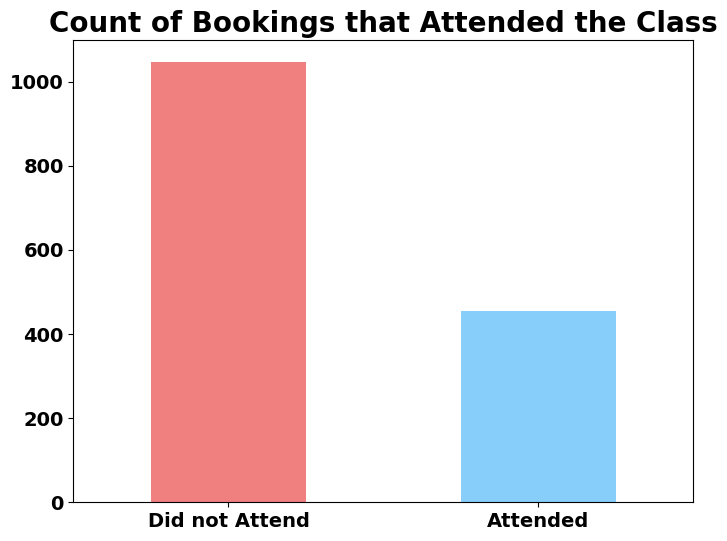

In [17]:
# Create a bar chart to show the count of attendees
plt.figure(figsize = (8, 6)) 
df_clean['attended'].value_counts().plot(kind = "bar", color=['lightcoral', 'lightskyblue'])
plt.xlabel('', size = 16, fontweight = 'bold')
plt.xticks([0, 1], ['Did not Attend', 'Attended'], fontweight = "bold", rotation = 360, fontsize = 14)
plt.yticks(fontweight = "bold", fontsize = 14)
plt.ylabel('', size = 16, fontweight = 'bold')
plt.title('Count of Bookings that Attended the Class', size = 20, fontweight = 'bold')
    
plt.show() 

- **a)** '0' indicating that the member did not attend the class has the highest number of observations
- **b)** Observations are not balanced. About 70% of the observers did not attend the lesson, while about 30% attended the lesson.

# **Task 3**

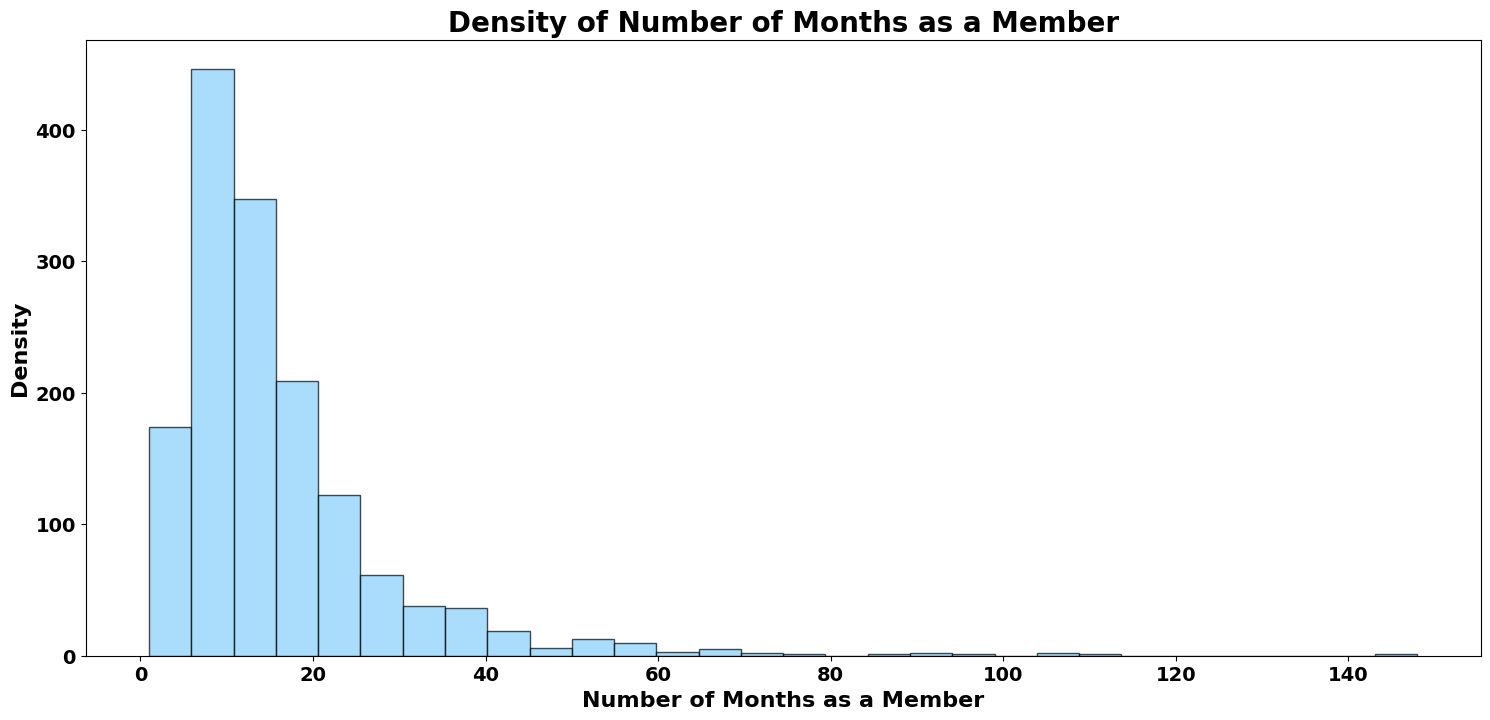

In [18]:
plt.figure(figsize = (18, 8))
plt.hist(df_clean['months_as_member'], bins=30, color='lightskyblue', edgecolor='black', alpha=0.7)
plt.ylabel('Density', fontsize = 16, fontweight = "bold")
plt.xlabel('Number of Months as a Member', fontsize = 16, fontweight = "bold")
plt.xticks(fontweight = "bold", fontsize = 14)
plt.yticks(fontweight = "bold", fontsize = 14)
plt.title('Density of Number of Months as a Member', fontsize = 20, loc = 'center', fontweight = "bold")

plt.show()

- The distribution of the number of months as a column of a member is skewed to the right, meaning that the frequency data is not evenly spread (normal distribution). The data is clustered at the left end and has a long tail extending to the right.

# **Task 4**

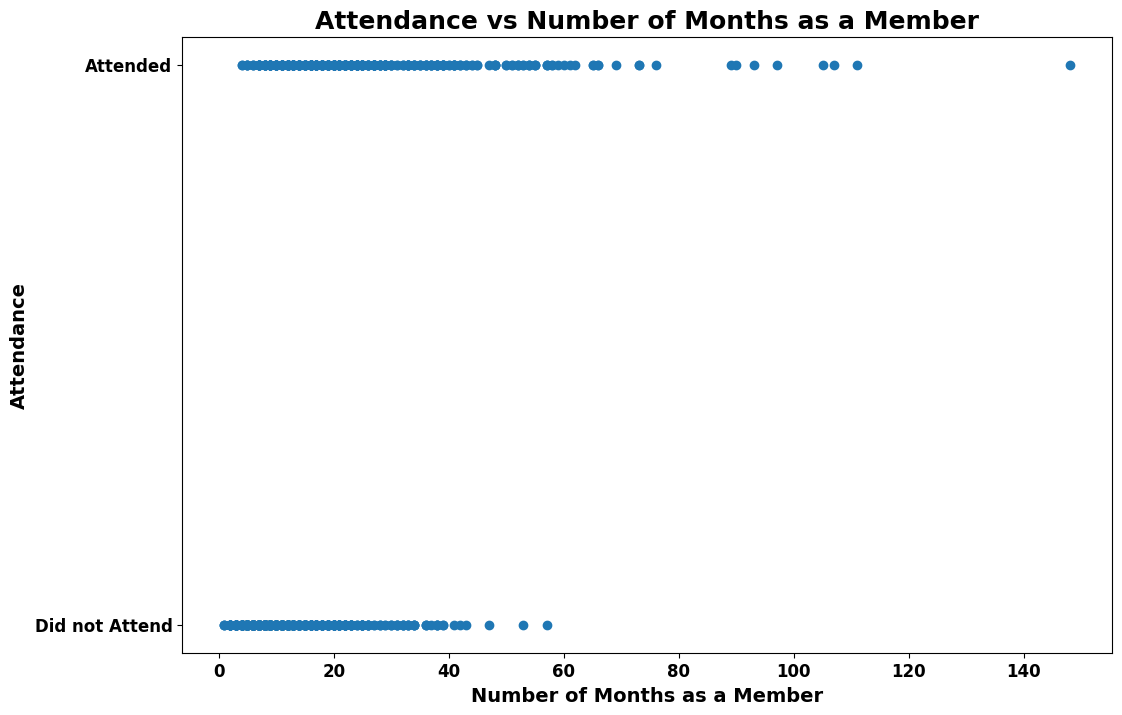

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(x=df_clean['months_as_member'], y=df_clean['attended'])

plt.xlabel('Number of Months as a Member', fontsize=14, fontweight='bold')
plt.ylabel('Attendance', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks([0, 1], ['Did not Attend', 'Attended'], fontsize=12, fontweight='bold')
plt.title('Attendance vs Number of Months as a Member', fontsize=18, loc='center', fontweight='bold')

plt.show()

- The higher the number of months spent as a fitness club member, the higher the participation percentage. 

# **Task 5**
- Predicting whether member will attend the class or not is a binary classification problem in machine learning.

In [20]:
from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
df_clean['category'] = le_cat.fit_transform(df_clean['category'])

le_time = LabelEncoder()
df_clean['time'] = le_time.fit_transform(df_clean['time'])
features = df_clean.drop(columns = 'attended')

X = pd.get_dummies(features, columns = ['day_of_week'])
y = df_clean['attended'].copy()

print(X.head(5))
print(y.head(5))

   months_as_member  weight  ...  day_of_week_Tue  day_of_week_Wed
0                17   79.56  ...                0                1
1                10   79.01  ...                0                0
2                16   74.53  ...                0                0
3                 5   86.12  ...                0                0
4                15   69.29  ...                0                0

[5 rows x 12 columns]
0    0
1    0
2    0
3    0
4    0
Name: attended, dtype: int64


In [21]:
# split dataset into 75% training set and 25% test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# **Modelling**

# **Task 6**

In [22]:
# import AdaBoostClassifier to build baseline model
from sklearn.ensemble import RandomForestClassifier

# fit baseline model
randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, y_train)

RandomForestClassifier()

# **Task 7**

In [23]:
# import Logistic Regression Model to build a comparison model
from sklearn.linear_model import LogisticRegression

# fit comparison model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

# **Taks 8**

I chose RandomForest Classifier as the base model because it is accurate and precise compared to many other models. The comparison model I have chosen is LogisticRegression because it has been found to predict better for datasets with severely imbalanced proportions compared to RandomForest Classifier and is very efficient to train and interpret.

# **Taks 9**

In [24]:
# print accuracy for baseline model
print('Random Forest model test accuracy score : {:.3f}%'.format(randomforest_model.score(X_test, y_test) * 100))
# print accuracy for comparison model
print('Logistic Regression model test accuracy score : {:.3f}%'.format(logreg_model.score(X_test, y_test) * 100))

Random Forest model test accuracy score : 73.600%
Logistic Regression model test accuracy score : 77.067%


# **Taks 10**

- I choose accuracy to evaluate the model because it is easy to implement. Accuracy focuses on correct predictions of all predictions and is a good metric for evaluating model performance in simple cases.

- The accuracy of the RandomForest Classifier on the test set is 72.267% and the accuracy of the Logistic Regression model on the test set is 77.067%, meaning that the Logistic Regression model predicts more accurately whether a member will attend a class or not.

- This is probably due to the fact that the Logistic Regression model predicts better for datasets with severely unbalanced proportions.